# UBCS3

1. How to train
2. Bad example of gradient descent

# 1. How to train your neural network

See Patrick's Notes

# 2. Bad example of gradient descent

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

(<matplotlib.collections.PathCollection at 0x11f2a8668>, (-5, 5))

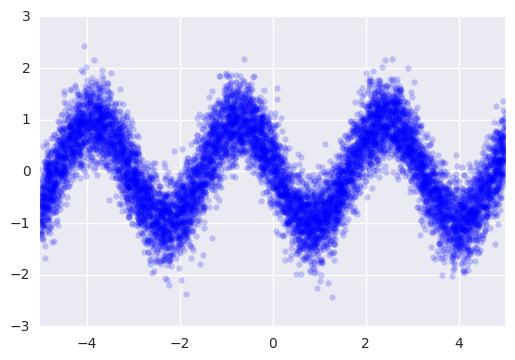

In [59]:
N = 10000
param = [2,3]
x = np.random.rand(N)*10 - 5
noise = np.random.randn(N)*0.4
y = np.sin(param[0]*x+param[1]) + noise
plt.scatter(x,y,lw=0,alpha=0.2),plt.xlim([-5,5])

In [60]:
from sklearn.utils import shuffle

In [92]:
def train(x,y,p0,epsilon=0.01,delta=0.0001,max_iter=1000):
    N = len(x)
    params = np.array(p0)
    a = p0[0]
    b = p0[1]
    dCda = (-1/N)*np.sum( (y-np.sin(a*x + b))*np.cos(a*x+b)*x )
    dCdb = (-1/N)*np.sum( (y-np.sin(a*x + b))*np.cos(a*x+b) )
    grad = np.array([dCda,dCdb])
    params = params - epsilon * grad
    n_iter = 1
    steps = params
    while np.linalg.norm(grad) > delta and n_iter < max_iter:
        a = params[0]
        b = params[1]
        dCda = (-1/N)*np.sum( (y-np.sin(a*x + b))*np.cos(a*x+b)*x )
        dCdb = (-1/N)*np.sum( (y-np.sin(a*x + b))*np.cos(a*x+b) )
        grad = np.array([dCda,dCdb])
        params = params - epsilon * grad
        steps = np.vstack([steps,params])
        n_iter = n_iter + 1
    print('done after %d iters with NormGrad(f)) = %6.4g' % (n_iter-1,np.linalg.norm(grad)))
    return params,steps
    

In [93]:
params, steps = train(x,y,[1,3])
params1, steps1 = train(x,y,[3,3])
params2, steps2 = train(x,y,[2,3])
params3, steps3 = train(x,y,[2,4])

done after 999 iters with NormGrad(f)) = 0.01179
done after 999 iters with NormGrad(f)) = 0.00119
done after 683 iters with NormGrad(f)) = 9.995e-05
done after 999 iters with NormGrad(f)) = 0.003108


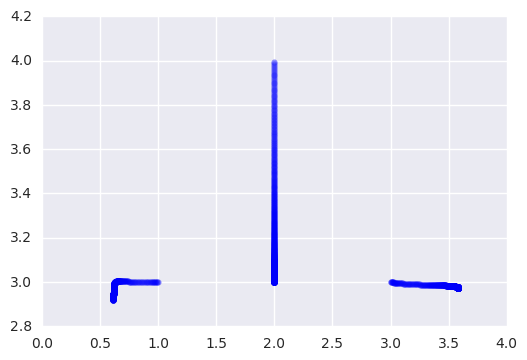

In [94]:
for step in [steps,steps1,steps2,steps3]:
    plt.scatter(step[:,0],step[:,1],lw=0,alpha=0.2)
    plt.hold('on')